# <p style="background-color:darkviolet;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>Unsupervised Project</b></p>

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

## Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from skimpy import clean_columns

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

You can rename columns to more usable, if you need.

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000,100.500,57.879,1.000,50.750,100.500,150.250,200.000
Age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
Annual Income (k$),200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
Spending Score (1-100),200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: CustomerID
Number of Unique Values: 200
First 10 Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
... and 190 more unique values

Column: Gender
Number of Unique Values: 2
Unique Values: ['Male' 'Female']

Column: Age
Number of Unique Values: 51
First 10 Unique Values: [19 21 20 23 31 22 35 64 30 67]
... and 41 more unique values

Column: Annual Income (k$)
Number of Unique Values: 64
First 10 Unique Values: [15 16 17 18 19 20 21 23 24 25]
... and 54 more unique values

Column: Spending Score (1-100)
Number of Unique Values: 84
First 10 Unique Values: [39 81  6 77 40 76 94  3 72 14]
... and 74 more unique values



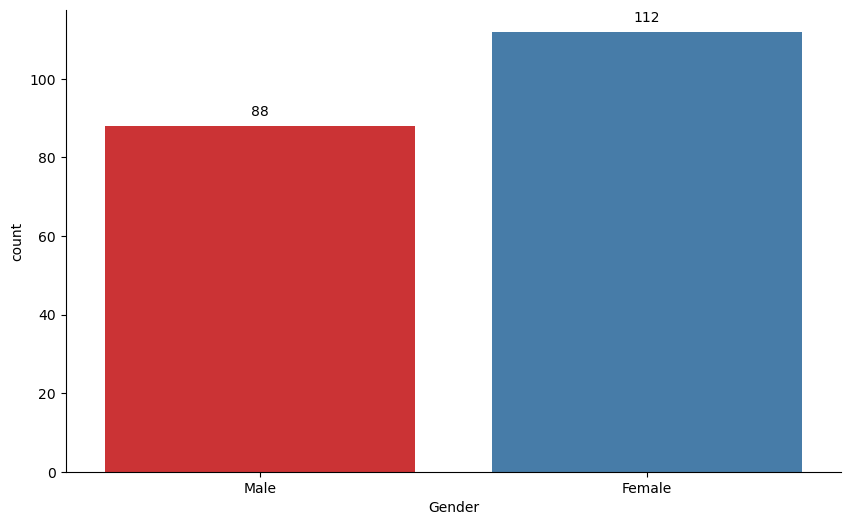

In [5]:
ax = sns.countplot(x=df["Gender"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

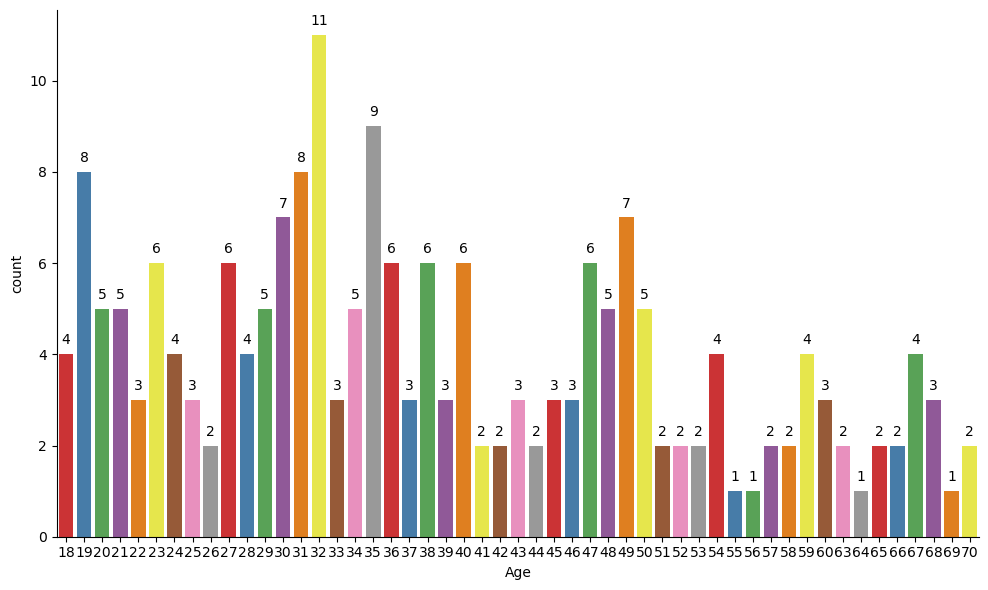

In [6]:
ax = sns.countplot(x=df["Age"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [7]:
class_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(class_mapping)

In [8]:
df.Gender.value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
df.info()
# null value yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [11]:
df = clean_columns(df)

In [14]:
df.rename(columns={'annual_income_k_$': 'annual_income'}, inplace=True)
df.rename(columns={'spending_score_1_100': 'spending_score'}, inplace=True)

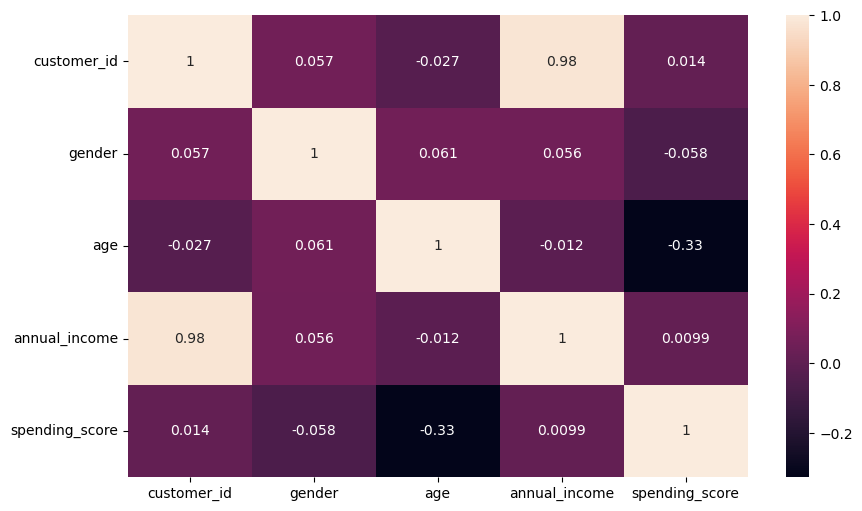

In [15]:
sns.heatmap(data=df.corr(), annot=True);

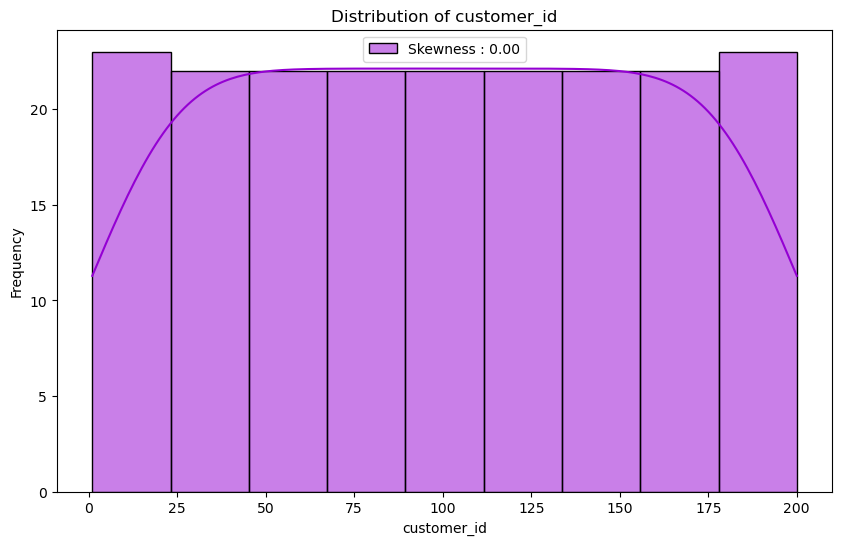

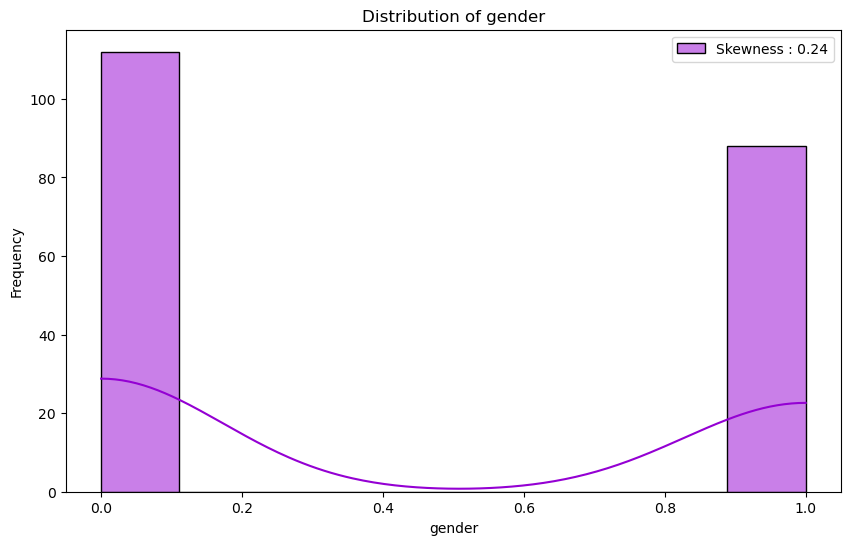

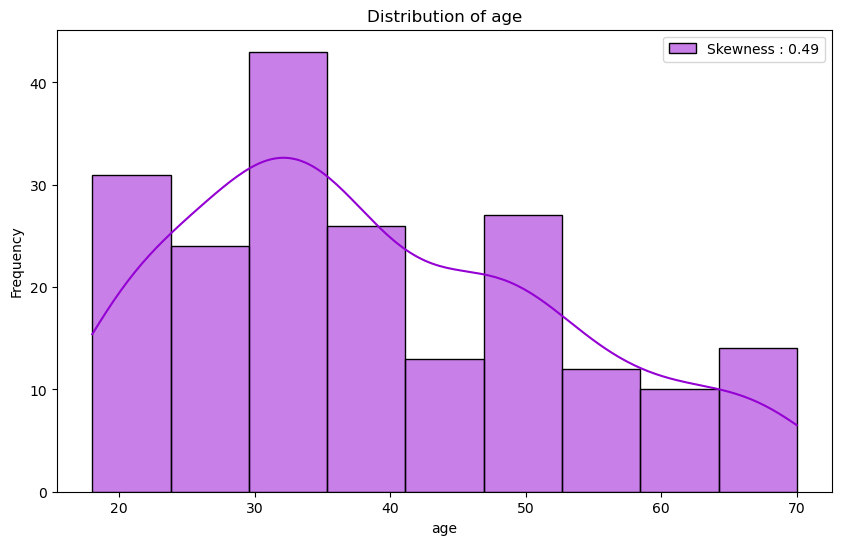

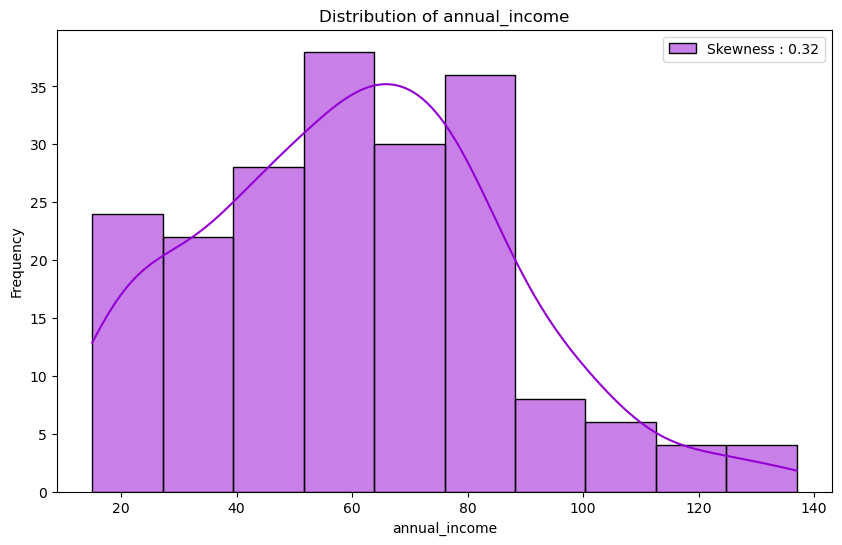

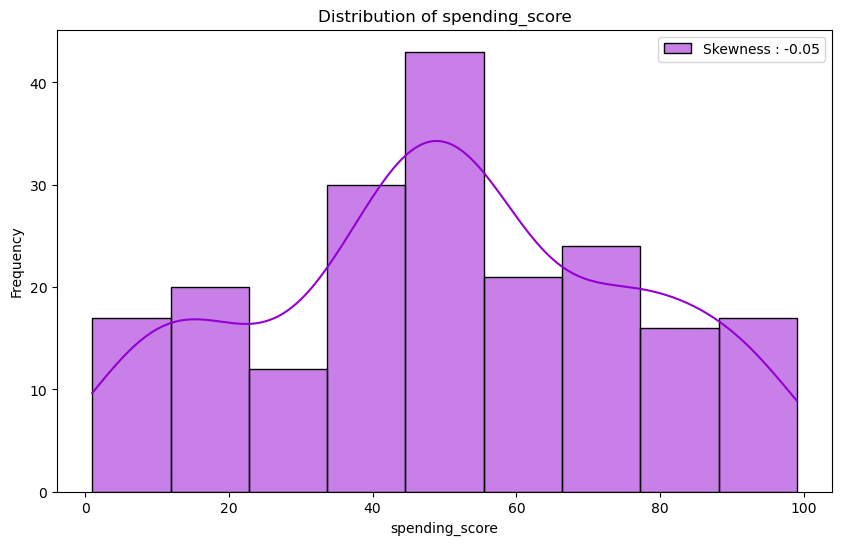

In [16]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="darkviolet", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

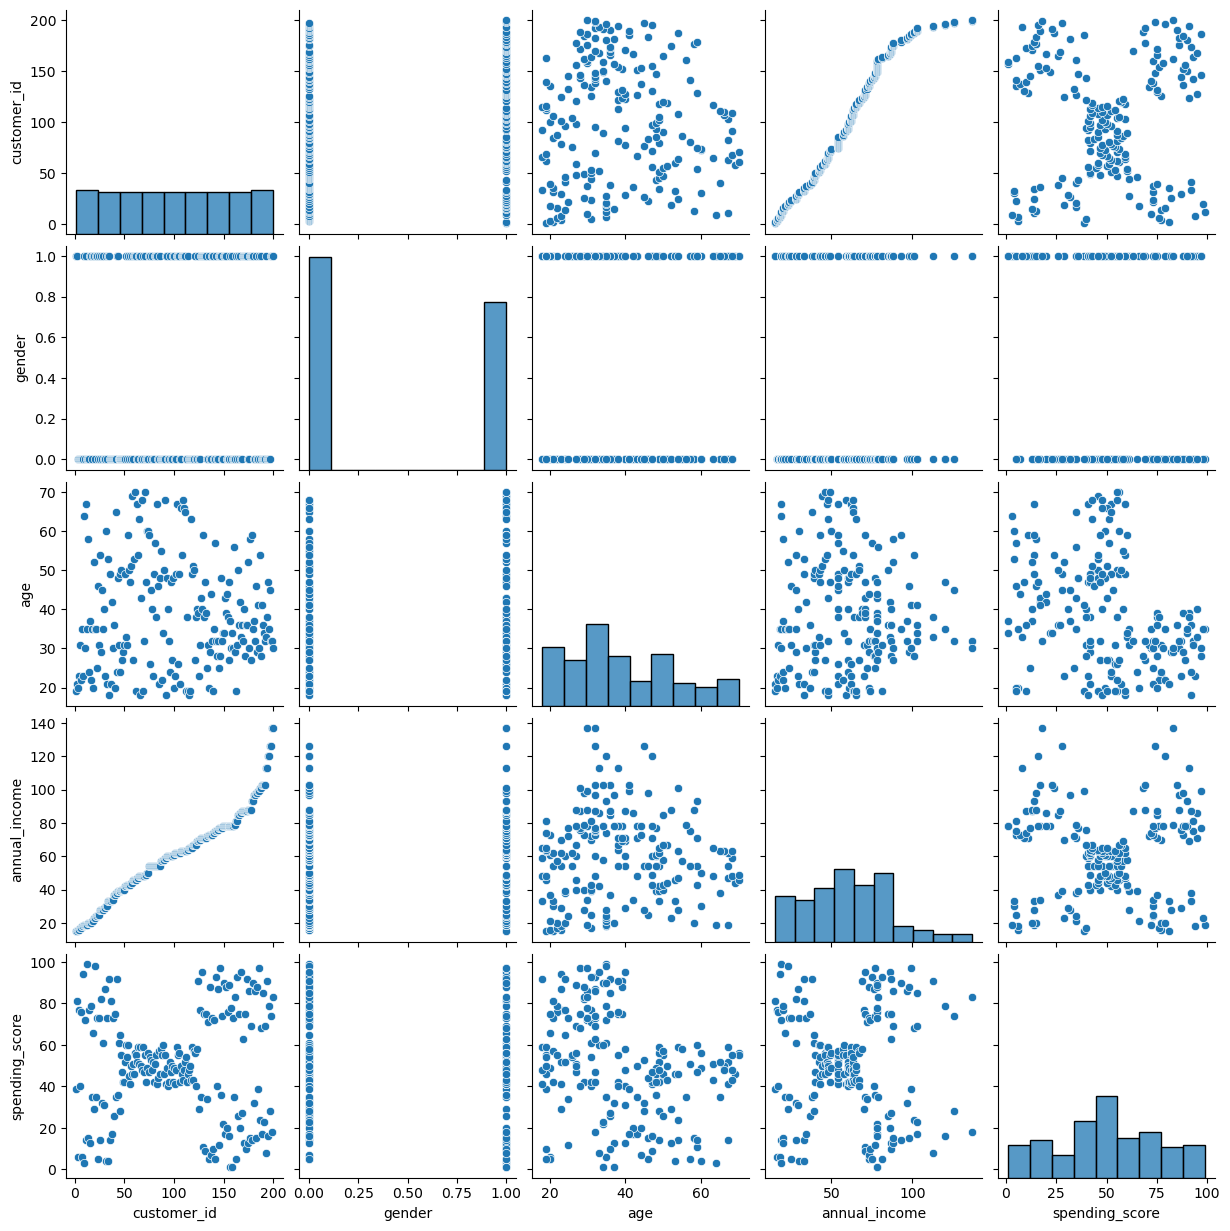

In [25]:
sns.pairplot(data=df);

# K-means Clustering

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Clustering based on Age and Spending Score - X1

### *i. Create a new dataset with two variables of your choice*

### *ii. Determine optimal number of clusters*

### Why silhouette_score is negative?

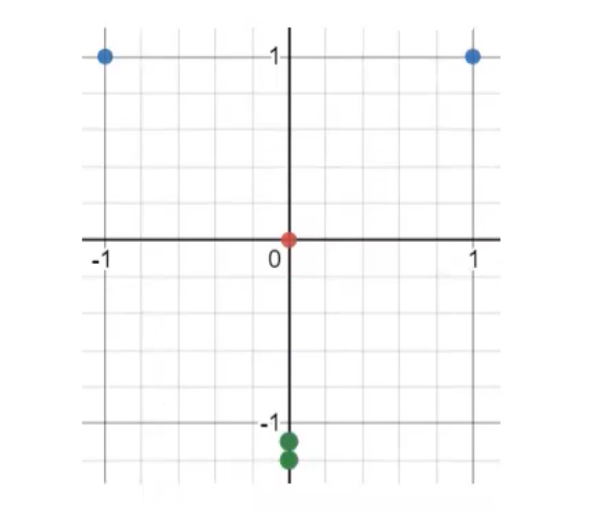

__Silhouette Score-->__ (1-√2) / √2 = -0.29

### *iii. Apply K Means*

### *iv. Visualizing and Labeling All the Clusters*

## Clustering based on Annual Income and Spending Score - X2

### *i. Create a new dataset with two variables of your choice*

### *ii. Determine optimal number of clusters*

### *iii. Apply K Means*

### *iv. Visualizing and Labeling All the Clusters*

# Hierarchical Clustering

## *i. Determine optimal number of clusters using Dendogram*

## ii. *Apply Agglomerative Clustering*

## Clustering based on Age and Spending Score- X1

## Clustering based on Annual Income and Spending Score- X2

## iii. *Visualizing and Labeling All the Clusters* 

### Age and Spending Score- X1

### Annual Income and Spending Score- X2

### Interpretation based on Age and Spending Score- X1

# Conclusion

# <p style="background-color:green;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>Unsupervised Project </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |